# DM-41019 : use OpSim catalog as an imSim AOS input

Last verified to run: 01/23/2024

Versions:
* **lsst_distrib**  w_2024_02  (ext, cvmfs) 
* **ts_wep** v8.1.1
* **galsim**  2.5.1  
* **imsim** v2.0 (due to a lack of detailed tagging in `imsim`, note that most recent commit was e6124cfc from Jan 18th, 2024) 
* **skycatalogs** 1.7.0-rc2 (commit d0d0d58ae1e) 


## Setup on USDF:
    
    >> imsim 
    
    >> aos 
    
these aliases stand for 

    >> source  /sdf/home/s/scichris/link_to_scichris/WORK/imsim_home/imsim-setup.sh
    >> source /sdf/group/rubin/ncsa-home/home/scichris/aos/setup_aos.sh
    
which contain:
    
   **imsim-setup.sh**

    #!/usr/bin/env bash
    source /cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2023_47/loadLSST-ext.bash 
    setup lsst_distrib 
    export IMSIM_HOME=/sdf/home/s/scichris/link_to_scichris/WORK/imsim_home
    export RUBIN_SIM_DATA_DIR=$IMSIM_HOME/rubin_sim_data
    export SIMS_SED_LIBRARY_DIR=$IMSIM_HOME/rubin_sim_data/sims_sed_library
    setup -k -r $IMSIM_HOME/imSim
    setup -k -r $IMSIM_HOME/skyCatalogs
    
    
   **setup_aos.sh**
   
    #!/usr/bin/env bash
    export PATH_TO_TS_WEP=/sdf/group/rubin/ncsa-home/home/scichris/aos/ts_wep/
    export PATH_TO_TS_OFC=/sdf/group/rubin/ncsa-home/home/scichris/aos/ts_ofc/
    export PATH_TO_TS_IMSIM=/sdf/data/rubin/user/scichris/WORK/aos_packages/ts_imsim/

    eups declare -r $PATH_TO_TS_WEP -t $USER --nolocks
    eups declare -r $PATH_TO_TS_OFC -t $USER --nolocks
    eups declare -r $PATH_TO_TS_IMSIM -t $USER --nolocks

    setup ts_ofc -t $USER  -t current
    setup ts_wep -t $USER  -t current
    setup ts_imsim -t $USER -t current 

    export LSST_ALLOW_IMPLICIT_THREADS=True

## Explore opSim database using baseline_v3.2_10yrs

In [1]:
import sqlite3
import numpy as np
import pandas as pd

columns = '*' # select all columns

# query for all visits scheduled  between these dates
mjd_start = 61800
mjd_end = 62500

opsim_db_file = '/sdf/data/rubin/user/jchiang/imSim/rubin_sim_data/opsim_cadences/baseline_v3.2_10yrs.db'

query = (f"select {columns} from observations where "
         f" {mjd_start} < observationStartMJD "
         f"and observationStartMJD < {mjd_end} "
        )

with sqlite3.connect(opsim_db_file) as con:
    df0 = pd.read_sql(query, con)

print(len(df0))

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


384634


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df0[:10]

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,airmass,seeingFwhm500,seeingFwhmEff,seeingFwhmGeom,skyBrightness,night,slewTime,visitTime,slewDistance,fiveSigmaDepth,altitude,azimuth,paraAngle,cloud,moonAlt,sunAlt,note,target,fieldId,proposalId,block_id,observationStartLST,rotTelPos,rotTelPos_backup,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id
0,620088,0.546178,-35.466250,61800.029519,61800.052436,15.0,i,275.791864,0.0,1,1.786619,0.645924,1.159512,1.005119,18.215289,1004,112.417002,16.0,57.480105,22.007741,34.036195,245.374497,105.373386,0.0,6.407891,-12.370712,"twilight_near_sun, 0",,-1,10,1,68.673633,21.16525,0.0,271.929209,240.612010,311.673930,-17.941097,344.834636,-1.714807,36.770580,46.497703,20.200751,-114.625503,0
1,620089,356.935778,-36.270136,61800.029759,61800.052436,15.0,i,274.446672,0.0,1,1.939997,0.645924,1.218250,1.053402,18.071301,1004,4.719320,16.0,3.033959,21.868502,31.028528,243.357125,106.718578,0.0,6.334876,-12.435441,"twilight_near_sun, 0",,-1,11,1,68.760200,21.16525,0.0,271.888075,240.560746,311.674177,-17.941032,344.837051,-1.713506,36.325400,43.769782,20.202140,-116.502391,0
2,620090,353.256188,-36.995973,61800.029998,61800.052436,15.0,i,273.108964,0.0,1,2.105144,0.645924,1.279455,1.103712,17.950589,1004,4.723977,16.0,3.040449,21.739902,28.361106,241.520609,108.056286,0.0,6.261844,-12.500149,"twilight_near_sun, 0",,-1,12,1,68.846786,21.16525,0.0,271.846933,240.509408,311.674424,-17.940968,344.839467,-1.712206,36.127880,41.085248,20.203530,-118.315459,0
3,620091,355.598991,-39.190407,61800.030237,61800.052436,15.0,i,275.397987,0.0,1,1.958784,0.645924,1.225316,1.059209,18.106459,1004,4.657245,16.0,2.865973,21.877725,30.698519,239.701782,105.767263,0.0,6.189045,-12.564614,"twilight_near_sun, 0",,-1,0,1,68.933094,21.16525,0.0,271.805924,240.458172,311.674670,-17.940904,344.841878,-1.710909,38.743323,43.469676,20.204916,-120.109909,0
4,620092,354.095265,-42.077105,61800.030474,61800.052436,15.0,i,276.190494,0.0,1,1.982059,0.645924,1.234031,1.066373,18.058966,1004,4.430362,16.0,3.103925,21.844408,30.299882,236.100234,104.974756,0.0,6.117045,-12.628336,"twilight_near_sun, 0",,-1,1,1,69.018454,21.16525,0.0,271.765366,240.407437,311.674914,-17.940840,344.844263,-1.709627,41.213784,43.304736,20.206288,-123.690296,0
5,620093,351.708899,-39.880944,61800.030713,61800.052436,15.0,i,273.685844,0.0,1,2.137472,0.645924,1.291208,1.113373,17.976717,1004,4.636846,16.0,2.840305,21.739750,27.894327,237.916107,107.479406,0.0,6.044316,-12.692668,"twilight_near_sun, 0",,-1,2,1,69.104676,21.16525,0.0,271.724398,240.356126,311.675160,-17.940776,344.846675,-1.708332,38.679175,40.843799,20.207674,-121.855438,0
6,620094,347.737179,-40.452118,61800.030953,61800.052436,15.0,i,271.826670,0.0,1,2.354544,0.735720,1.500507,1.285417,17.823456,1004,4.756254,16.0,3.088071,21.480127,25.132350,236.216642,109.338580,0.0,5.971165,-12.757338,"twilight_near_sun, 0",,-1,3,1,69.191397,21.16525,0.0,271.683194,240.304454,311.675407,-17.940711,344.849102,-1.707030,38.833446,38.271694,20.209069,-123.532396,0
7,620095,349.500444,-37.624909,61800.031189,61800.052436,15.0,i,271.419123,0.0,1,2.330146,0.735720,1.491159,1.277732,17.748810,1004,4.404504,16.0,3.141279,21.452371,25.414114,239.644589,109.746128,0.0,5.899253,-12.820877,"twilight_near_sun, 0",,-1,4,1,69.276649,21.16525,0.0,271.642689,240.253596,311.675650,-17.940648,344.851489,-1.705749,36.172771,38.441599,20.210442,-120.080289,0
8,620096,347.449214,-35.319397,61800.031428,61800.052436,15.0,i,269.452918,0.0,1,2.560242,0.735720,1.577839,1.348983,17.791400,1004,4.642116,16.0,2.834630,21.389944,22.991094,241.341471,111.712332,0.0,5.826502,-12.885122,"twilight_near_sun, 0",,-1,5,1,69.362893,21.16525,0.0,271.601712,240.202083,311.675896,-17.940584,344.853906,-1.704454,33.701424,36.109018,20.211831,-118.358133,0
9,620097,351.075974,-34.739587,61800.031668,61800.052436,15

In [4]:
df0.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'rotSkyPos_desired', 'numExposures', 'airmass', 'seeingFwhm500',
       'seeingFwhmEff', 'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime',
       'visitTime', 'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth',
       'paraAngle', 'cloud', 'moonAlt', 'sunAlt', 'note', 'target', 'fieldId',
       'proposalId', 'block_id', 'observationStartLST', 'rotTelPos',
       'rotTelPos_backup', 'moonAz', 'sunAz', 'sunRA', 'sunDec', 'moonRA',
       'moonDec', 'moonDistance', 'solarElong', 'moonPhase', 'cummTelAz',
       'scripted_id'],
      dtype='object')

One of the more useful columns is `night` that contains a unique identifier of a given observing night.  

We can confirm that all visits indeed correspond to the same night by calculating time difference between successive visits, and grouping visits that have `dt` less than a few hours (which would correspond to a daytime break):

In [5]:
# calculate time difference 
deltas = []
for i in range(len(df0)-1):
    deltas.append(df0['observationStartMJD'][i+1] - df0['observationStartMJD'][i])
deltas.append(0) # for the last entry
df0['dt'] = deltas


# create groups 

groups = []
groupId = 0
for i in range(len(df0)):
    groups.append(groupId)
    if df0['dt'][i] > 0.1:  # dt in units of days, so 0.1 is  0.1*24 hrs = 2.4 hrs 
        groupId += 1 
df0['group'] = groups

# find how many visits in each group
groups, count = np.unique(df0['group'], return_counts=True)

count_dic = {}
for i in range(len(groups)):
    count_dic[groups[i]] = count[i]

In [6]:
count_dic

{0: 764,
 1: 728,
 2: 735,
 3: 740,
 4: 779,
 5: 543,
 6: 344,
 7: 185,
 8: 790,
 9: 783,
 10: 767,
 11: 777,
 12: 810,
 13: 764,
 14: 779,
 15: 759,
 16: 811,
 17: 773,
 18: 792,
 19: 785,
 20: 221,
 21: 187,
 22: 801,
 23: 795,
 24: 793,
 25: 804,
 26: 815,
 27: 802,
 28: 793,
 29: 848,
 30: 176,
 31: 820,
 32: 849,
 33: 839,
 34: 845,
 35: 835,
 36: 893,
 37: 847,
 38: 841,
 39: 848,
 40: 871,
 41: 875,
 42: 869,
 43: 867,
 44: 901,
 45: 868,
 46: 865,
 47: 852,
 48: 883,
 49: 871,
 50: 880,
 51: 199,
 52: 647,
 53: 647,
 54: 454,
 55: 928,
 56: 921,
 57: 903,
 58: 902,
 59: 927,
 60: 911,
 61: 894,
 62: 954,
 63: 946,
 64: 923,
 65: 923,
 66: 967,
 67: 943,
 68: 929,
 69: 963,
 70: 449,
 71: 936,
 72: 944,
 73: 973,
 74: 967,
 75: 951,
 76: 953,
 77: 702,
 78: 974,
 79: 958,
 80: 959,
 81: 985,
 82: 1013,
 83: 477,
 84: 482,
 85: 973,
 86: 502,
 87: 483,
 88: 482,
 89: 1001,
 90: 997,
 91: 1002,
 92: 1060,
 93: 1013,
 94: 478,
 95: 1020,
 96: 1000,
 97: 1016,
 98: 1022,
 99: 743,
 

In [7]:
groupCount = []
for i in range(len(df0)):
    groupCount.append(count_dic[df0['group'][i]])
df0['groupCount'] = groupCount

Select one group, and plot `dt` and sun altitude:

Text(0.5, 1.0, 'group 150 ')

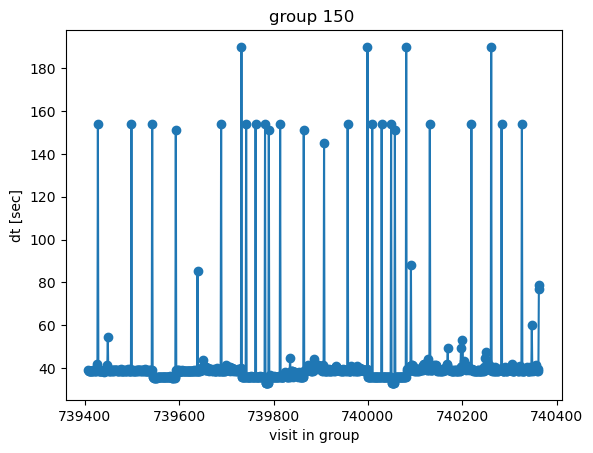

In [9]:
import matplotlib.pyplot as plt 
groupId=150
mask = (df0['group'] == groupId)# | (df0['group'] == groupId+1)
plt.plot(df0['observationId'][mask][:-1],  df0['dt'][mask][:-1]*24*3600,marker='o') # fraction of the day... 
plt.ylabel('dt [sec]')
plt.xlabel('visit in group')
plt.title(f'group {groupId} ')



Text(0, 0.5, 'Sun altitude [deg]')

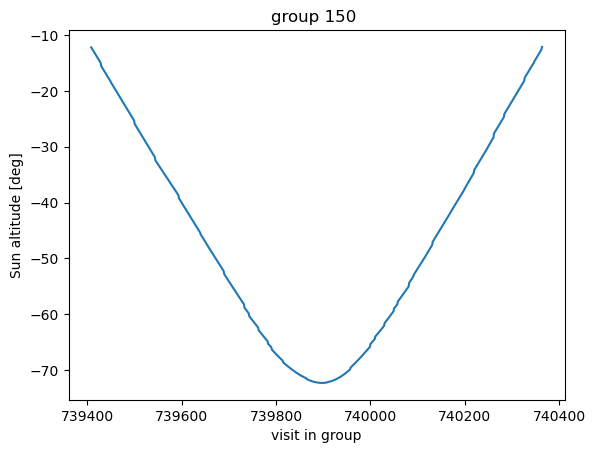

In [13]:
plt.title(f'group {groupId} ')
plt.plot(df0['observationId'][mask], df0['sunAlt'][mask])
plt.xlabel('visit in group')
plt.ylabel('Sun altitude [deg]')

In [14]:
np.unique(df0['night'][mask])

array([1206])

This confirms that grouping visits by time difference corresponds to the same night.  In this case, all grouped visits were from night 1206. 

## Choosing a visit close to a given sky coordinate

Given the contents of the opSim database we can choose an appropriate visit  / night given a variety of constraints. For example,  to choose a visit close to a specific ra/dec location (which we set here as `ra=20h 28min 18.74s` and `dec=-87deg 28min 19.9sec`, like in https://jira.lsstcorp.org/browse/DM-35005) we can do:

In [1]:
import sqlite3
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from astropy.coordinates import SkyCoord
from astropy import units as u

# example sky coordinates
c0 = SkyCoord('20:28:18.74 -87:28:19.9', unit=(u.hourangle, u.deg))

# select all columns
columns = '*'

opsim_db_file = '/sdf/data/rubin/user/jchiang/imSim/rubin_sim_data/opsim_cadences/baseline_v3.2_10yrs.db'

ra0 = c0.ra.deg
dec0 =  c0.dec.deg
delta = 1 # deg  - maximum radial separation of catalog sources from selected position

query = (f"select {columns} from observations "
         f"where ({ra0 - delta} < fieldRA) "
         f"and (fieldRA < {ra0 + delta}) "
         f"and ({dec0 - delta} < fieldDec) "
         f"and (fieldDec < {dec0 + delta})")

with sqlite3.connect(opsim_db_file) as con:
    df0 = pd.read_sql(query, con)
    

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
df0

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,airmass,seeingFwhm500,seeingFwhmEff,seeingFwhmGeom,skyBrightness,night,slewTime,visitTime,slewDistance,fiveSigmaDepth,altitude,azimuth,paraAngle,cloud,moonAlt,sunAlt,note,target,fieldId,proposalId,block_id,observationStartLST,rotTelPos,rotTelPos_backup,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id
0,68609,306.661504,-86.924706,60907.222885,60907.251796,30.0,u,285.230776,285.230776,1,1.843517,0.493944,1.140989,0.989893,22.577148,111,9.405863,31.0,3.207455,23.311388,32.849998,181.917147,32.595625,0.000,-50.097017,-70.460814,"pair_33, ug, a",,-1,31,1,338.293047,-42.173599,-47.621862,83.642600,155.468972,149.311262,12.475485,112.418530,26.631596,119.609695,105.310656,20.754213,-43.881511,0
1,68659,306.661504,-86.924706,60907.246674,60907.251796,30.0,g,285.230776,285.230776,2,1.857446,0.589094,1.223033,1.057333,22.030924,111,9.405863,34.0,3.207455,24.179729,32.572990,182.354017,41.406847,0.000,-43.117107,-66.027409,"pair_33, ug, b",,-1,81,1,346.880500,-33.362377,-47.621862,80.618694,134.791048,149.333306,12.467650,112.861448,26.609109,119.593130,105.302361,20.551207,-48.434874,0
2,726966,306.608899,-87.397563,61984.000545,61984.024797,30.0,z,10.539573,0.000000,2,1.929010,0.981618,1.612255,1.377274,18.626410,1188,27.973744,34.0,3.111463,22.050804,31.225027,177.195329,291.414228,0.125,72.539933,-24.025511,"blob_long, iz, a",,-1,38,1,239.573633,-58.046199,0.000000,80.009662,277.485396,131.309193,18.035812,258.319761,-25.821576,62.463349,110.629359,72.526945,-175.471844,0
3,1429362,307.898688,-87.230149,63240.216662,63240.255151,30.0,g,190.864470,190.864470,2,2.162996,0.795031,1.681505,1.434197,21.853259,2444,4.898368,34.0,3.153759,23.700319,27.537026,180.668252,167.965745,0.000,-16.022911,-37.328838,"pair_33, gr, a",,-1,10,1,115.561946,-1.169786,-2.979936,123.002069,173.567219,289.531984,-22.221248,237.020538,-18.162864,70.949817,65.152872,27.341871,-205.207769,0
4,1429412,307.898688,-87.230149,63240.242674,63240.255151,30.0,r,190.864470,190.864470,2,2.167267,0.709344,1.449782,1.243721,20.789772,2444,4.889073,34.0,3.153759,23.429074,27.478163,180.161548,177.110812,0.000,-9.297232,-35.672059,"pair_33, gr, b",,-1,60,1,124.951927,7.975282,-2.979936,117.688226,162.924294,289.560375,-22.217719,237.467997,-18.248823,70.843448,65.155961,27.115905,-207.590674,0
5,2032781,306.709935,-87.895073,64323.253059,64323.281498,30.0,z,140.300978,140.300978,2,2.117906,0.662950,1.269820,1.095792,18.531647,3527,19.696814,34.0,2.817896,22.251344,28.174896,180.440611,169.579535,0.000,42.277248,-33.066577,"pair_33, iz, a",,-1,30,1,116.156708,-50.119488,-55.435473,9.176925,157.859535,275.500548,-23.338420,122.733061,17.095080,109.194879,64.865931,85.410819,-136.093553,0
6,2032831,306.709935,-87.895073,64323.278912,64323.281498,30.0,i,140.300978,140.300978,2,2.120317,0.996458,1.789567,1.523024,19.033075,3527,19.696814,34.0,2.817896,22.279260,28.140006,180.054262,178.723656,0.000,42.780929,-29.443312,"pair_33, iz, b",,-1,80,1,125.489417,-40.975366,-55.435473,357.330786,148.796310,275.529204,-23.337413,122.978246,17.036857,109.137269,64.866385,85.291565,-137.101637,0


We see that even with such large allowance for pointing, only a few visits actually have a dark moon (phase < 30%) and good moon separation (>100 deg), so that lunar illumination doesn't cause any additional background...

Let's choose 68659: `ra=306.661504``dec=-86.924706` since it's a particularly dark night (only 20% lunar phase, 120 deg away, and the sun is ~60 deg below the horizon.
                                                   

In [5]:
df0_select = df0[df0['observationId'].values == 68659]

In [6]:
df0_select

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,airmass,seeingFwhm500,seeingFwhmEff,seeingFwhmGeom,skyBrightness,night,slewTime,visitTime,slewDistance,fiveSigmaDepth,altitude,azimuth,paraAngle,cloud,moonAlt,sunAlt,note,target,fieldId,proposalId,block_id,observationStartLST,rotTelPos,rotTelPos_backup,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id
1,68659,306.661504,-86.924706,60907.246674,60907.251796,30.0,g,285.230776,285.230776,2,1.857446,0.589094,1.223033,1.057333,22.030924,111,9.405863,34.0,3.207455,24.179729,32.57299,182.354017,41.406847,0.0,-43.117107,-66.027409,"pair_33, ug, b",,-1,81,1,346.8805,-33.362377,-47.621862,80.618694,134.791048,149.333306,12.46765,112.861448,26.609109,119.59313,105.302361,20.551207,-48.434874,0


In [13]:
ra_select =  df0_select['fieldRA'].values[0]
dec_select =  df0_select['fieldDec'].values[0]
night_select = df0_select['night'].values[0]

Find another visit that's from the same night, within 10 degrees, also in g-filter : 

In [15]:
delta = 10 # degrees 

query = (f"select {columns} from observations "
         f"where ({ra_select - delta} > fieldRA) "
         f"and (fieldRA < {ra_select + delta}) "
         f"and ({dec_select - delta} < fieldDec) "
         f"and (fieldDec < {dec_select + delta})"
        f"and filter=='g'"
        f"and night=={night}")
with sqlite3.connect(opsim_db_file) as con:
    df1 = pd.read_sql(query, con)

In [16]:
df1

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,airmass,seeingFwhm500,seeingFwhmEff,seeingFwhmGeom,skyBrightness,night,slewTime,visitTime,slewDistance,fiveSigmaDepth,altitude,azimuth,paraAngle,cloud,moonAlt,sunAlt,note,target,fieldId,proposalId,block_id,observationStartLST,rotTelPos,rotTelPos_backup,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id
0,68661,293.785092,-81.367774,60907.247589,60907.251796,30.0,g,269.445207,269.445207,2,1.738288,0.589094,1.175334,1.018125,22.064713,111,4.437946,34.0,2.833097,24.261111,35.119140,188.472041,57.991782,0.0,-42.849707,-65.828190,"pair_33, ug, b",,-1,83,1,347.210691,-32.563011,-47.621862,80.503219,134.136715,149.334153,12.467349,112.878163,26.608314,125.239360,109.431229,20.543567,-42.338052,0
1,68664,291.976271,-78.553061,60907.248991,60907.251796,30.0,g,265.963396,265.963396,2,1.694185,0.605066,1.179387,1.021456,22.064392,111,6.751895,34.0,3.159299,24.266680,36.175064,191.720210,62.156067,0.0,-42.439819,-65.518976,"pair_33, ug, b",,-1,86,1,347.717012,-31.880537,-47.621862,80.326209,133.155472,149.335453,12.466887,112.903748,26.607105,128.052353,111.444973,20.531875,-39.165430,0


Find out how close these visits are:

In [19]:
from astropy.coordinates import angular_separation
sep_deg=[]
for i in range(len(df1)):
    sep = angular_separation(ra_select*u.deg,dec_select*u.deg, df1['fieldRA'][i]*u.deg, df1['fieldDec'][i]*u.deg)
    sep_deg.append(np.rad2deg(sep))
df1['sep_deg'] = sep_deg
df1 = df1.sort_values('sep_deg')

In [21]:
df1[['observationId', 'sep_deg', 'fieldRA', 'fieldDec','filter']]


,observationId,sep_deg,fieldRA,fieldDec,filter
0,68661,5.675480077892328 deg,293.785092,-81.367774,g
1,68664,8.507424880771477 deg,291.976271,-78.553061,g


Ok, in this case we may want to choose visit  `68661` as our second field since it is closer to the original visit. 

# Simulating opSim visit(s) with imSim: the yaml config file


Given the instrument and visit number we can simulate the visit sourced wth opSim catalog using a single yaml config file.  Then the single call `galsim  imsim_config.yaml` would run the simulation.  An example `imsim_config.yaml` file that uses `opSim` database as an input is: 


    modules: [imsim]
    template: imsim-config-skycat
    
    # Use skyCatalogs for obtaining the objects to render.
    input.sky_catalog:
      file_name: /sdf/home/s/scichris/link_to_scichris/WORK/imsim_home/skyCatalogs_v2/skyCatalog.yaml
      #file_name: /sdf/data/rubin/user/jchiang/imSim/skyCatalogs_v2/skyCatalog.yaml
      approx_nobjects: 1500
      band: { type: OpsimData, field: band }
      mjd: { type: OpsimData, field: mjd }
      obj_types: [gaia_star]
      max_flux: 1e9
    
    input.opsim_data.file_name: /sdf/data/rubin/user/jchiang/imSim/rubin_sim_data/opsim_cadences/baseline_v3.2_10yrs.db
    input.opsim_data.visit: 740000
    
    input.atm_psf.screen_size: 819.2
    input.atm_psf.save_file:
      type: FormattedStr
      format: atm_psf_files/atm_psf_%08d-%1d-%s.pkl
      items:
          - { type: OpsimData, field: observationId }
          - { type: OpsimData, field: snap }
          - { type: OpsimData, field: band }
    
    # offset the piston by 1.5 mm 
    input.telescope.focusZ: 0   # telescope offset is in meters
    
    # disable checkpointing
    input.checkpoint: ""
    
    image.random_seed: '@input.opsim_data.visit'
    
    # enlarge the stamp size 
    #  to avoid cutting off donut edges 
    image.stamp_size: 300
    stamp.size: 300
    
    # disable FFT 
    stamp.fft_sb_thresh: 0
    
    
    # simulate no objects for OPD-only
    #image.nobjects: 0
    
    output.nproc: 120
    output.nfiles: 205
    output.det_num: {type: Sequence, nitems: 205}
    
    # make no amp images
    #output.readout: ""
    
    output.header:
        focusZ: 0.0   # header is in mm 
        seqnum: 941
    
    output.camera: LsstCam
    output.dir:
        type: FormattedStr
        format : output/%08d
        items:
            - "@input.opsim_data.visit"
    
    # create OPD at all LsstFAM CCD center  locations 
    # sorted by detId  

    output.opd:
        file_name:
            type: FormattedStr
            format: opd_%s.fits.fz
            items:
                - "@input.telescope.focusZ"
        rotTelPos:  "@input.telescope.rotTelPos"
        fields:
        - thx: -0.9403333333333335 deg
          thy: -1.6458888888888887 deg 
        - thx: -0.7056111111111111 deg
          thy: -1.6458888888888887 deg 
        - thx: -0.470888888888889 deg
          thy: -1.645888888888889 deg 
        - thx: -0.9403333333333336 deg

        # apply specific formatting to the amp images 
    output.readout.file_name:
        type: FormattedStr
        format : amp_%08d-%1d-%s-%s-det%03d-%s.fits.fz
        items:
            - "@input.opsim_data.visit"  # eg. 00740000
            - 0   # snap 
            - $band  # eg. g
            - $det_name  # eg. R22_S10 
            - "@output.det_num"  # eg. 91--> 091  
            - "@input.telescope.focusZ" #  eg. 0.0015 
    
    output.timeout: 1e5
    output.truth.dir: '@output.dir'
    output.truth.file_name.format: centroid_%08d-%1d-%s-%s-det%03d.txt.gz

Elements of this `imsim_config.yaml` file would be specific to what instrument is used.  Below we comment on individual elements of this `yaml` file. Any of this settings can be overridden during the `galsim` call, with eg.   `galsim  imsim_config.yaml   input.opsim_data.visit=76543`. 

-> imported modules: 

     modules: [imsim]
     template: imsim-config-skycat

are imported modules and templates. The location of `imsim-config-skycat` depends on the installation location of `imsim`, i.e. `$imsim-home`, for instance `$imsim_home/imSim/config/imsim-config-skycat.yaml`.

--> input.sky_catalog: `input.sky_catalog:`  is the source of object catalog; it instructs `imSim` to obtain input source catalog by querying `opSim`. 

The  `input.sky_catalog.file_name` is the location of the yaml config file for querying the opSim database.  An important component of that config is where to find the GAIA reference catalogs to obtain the source catalog. One way is to point to the main shared butler repository - the `repo/main`. In `/sdf/data/rubin/user/jchiang/imSim/skyCatalogs_v2/skyCatalog.yaml` : 

    gaia_star:
        area_partition: None
        butler_parameters:
          collections: HSC/defaults
          dstype: gaia_dr2_20200414
          repo: /repo/main
        data_file_type: butler_refcat
        sed_method: use_lut

However,  it suffers from a bottleneck where only a limited number of connections to a butler repo are allowed at any given time. If simulating hundreds of visits at the same time,  other users may be querying `/repo/main` at the same time, and when  limit is reached an error `psycopg2.OperationalError: SSL connection has been closed unexpectedly` will close connection and interrupt the simulation. 

One way to avoid that `/repo/main` bottleneck of a number of allowed connections is to ingest the GAIA refcat to a standalone location. For example, in `/sdf/data/rubin/user/scichris/WORK/imsim_home/skyCatalogs_v2/skyCatalog.yaml` we have:

    gaia_star:
    area_partition: None
    butler_parameters:
      collections: refcats/gaia_dr2_20200414
      dstype: gaia_dr2_20200414
      repo: /sdf/group/rubin/shared/scichris/DM-41019/gen3repo
    data_file_type: butler_refcat
    sed_method: use_lut


--> `input.sky_catalog.approx_nobjects`  is an approximation provided to galsim to do preparation in setting up multiprocessing, and is used to speed up staging of the individual CCD processes.( J. Chiang, priv.comm.)

--> `input.sky_catalog.obj_types: [gaia_star]`  limits the type of simulated objects to stars only (eg. excluding galaxies).

--> `input.sky_catalog.max_flux` sets the maximum allowed flux of a simulated source, it is a bright-end magnitude cutoff. "The  flux units are e- , converted from photons by the CCD QE - this is essentially the total number of photons detected by the CCD from a given object"(J.Chiang, priv.comm.). The value `max_flux:1e10` is about 10.5 magnitude cutoff, and `1e7` removes all sources brighter than ~13th mag. 

--> `input.opsim_data.visit` is the `opSim` visit number. Like all parameters, it can be overridden during the `galsim` call

--> `input.atm_psf.save_file` pertains to the naming pattern of the atmospheric PSF files. These are 3.1 GB per visit, so one needs to ensure sufficient disk space.

--> `input.telescope.focusZ` : the offset applied to the detector in meters, so 1.5 mm translates to  0.0015 m

-->  `image.stamp_size: 300`, `stamp.size: 300` - given that the donut postage stamp image is 160x160 px for LsstCam defocal offset of 1.5mm, this ensures that the stamp size for simulating a single source is larger than that. Otherwise we risk running into donuts that have square edges (as they did not fit in the default stamp). 

-->  `stamp.fft_sb_thresh: 0` : this is needed to ensure that the FFT mode is turned off. Otherwise sources above that flux limit would be treated with the faster FFT, but that assumes that they are in-focus, which would produce in-focus brighter stars together with defocal fainter donuts. In the  `template: imsim-config-skycat` config, it is set to 2e5, which is why we need to override it. 

--> `output.nproc: 120`: the number of processes allocated to galsim; it is able to use only 1 processor per CCD,  so unfortunately setting `output.nproc` to be larger than `output.nfiles` (number of output files) will not help.  I.e.  simulating  only 9 CCDs `output.nfiles: 9` with `output.nproc: 18` would mean that while 9 processors are used, 9 are idle. Galsim is not able to split 1 CCD per multiple processors. The upper limit for `output.nproc` is the amount of available cores.  On USDF, many `milano` or `ampere`  nodes have only `120` cores, so `output.nproc: 120` corresponds to the upper limit. This means that if simulating `output.nfiles:205`,   120 will be simulated at the same time on 120 cores, and once these are finished, the next batch of 85 remaining CCDs will get simulated.

-->  `output.det_num` this specifies which detectors should be simulated . For example, 
*   `output.det_num: {type: Sequence, nitems: 205}` with `output.nfiles:205` and `output.camera: LsstCam`   simulates all LSSTCam Full Array Mode science sensors and corner wavefront sensors
*    `output.det_num.first: 0` with `output.nfiles: 9` and `output.camera: LsstComCam` simulates all 9 rafts on the LSSTComCam
*    `output.det_num: {type: Sequence, nitems: 9}` with `output.nfiles: 9` and `output.camera: LsstComCam` simulates all 9 rafts on the LSSTComCam
*    `output.det_num: [191, 192, 195, 196, 199, 200, 203, 204] ` with  `output.nfiles: 8` and `output.camera: LsstCam` simulates only the corner wavefront sensors on LSSTCam

--> `output.header` specifies elements of the FITS header for the output amplifier files.  For each visit, we want to store the `focusZ` (in mm) and `seqNum`. This is because the `butler` ingests images given their  observation timestamp (`dayObs`) , and the sequence number `seqNum` , so that simulations based on the identical `visit` number but different `focusZ` need to be distinguished by their `seqNum`. The `exposure` number is constructed as eg.  `5028081800960`, with `50` corresponding to simulated `imsim` images (controller),  `280818` simulated date (here 18th of August 2028), and `00960` the sequence number.  

One possibility is to set `seqNum` to be N for the largest defocal offset in the negative direction, and increase N by 1 for each step in the focusing sequence, eg.  `focusZ:-1.5` is `seqNum:940`, then `focusZ:0` is `seqNum:941`, and `focusZ:1.5` is `seqNum:942`.  This can be extended for more fine-grained focus sequences, eg.  

    focusZ: [-1.5,-1.25,-1.0,-0.75,-0.5,-0.25, 0, 0.25, 0.5, 0.75, 1.0, 1.25,1.5]
    seqNum: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]   or 

    seqNum: [941, 942, 943, 945, 946...]

one only needs to ensure that there aren't two identical `seqNums` in the same observing day. The maximum `seqNum` is `99999` because it is assumed that the camera will not take more than 100,000 images in a single night (with 43,200 seconds in a 12hr night this corresponds to maximum of 0.5 exposures per second, which is 30 times greater than the planned cadence (of 2x15sec exposures back-to-back per filter, i.e. 1 exposure every 15 seconds). The typical `opSim` cadence produces about 1000-1500 images per night. 


Therefore it is worth noting that using `opSim` cadence and assumed focus 'sweep' by eg. `LSSTComCam` (3 focusZ positions,  [-1.5, 0, 1.5] mm) per `opSim` visit will produce three times more `seqNums` than usual, eg. given 1000 visits (pointings) per night, we simulate 3000 exposures (3 exposures per visit, each with different `focusZ`).  

--> `output.camera: LsstCam` specifies the instrument to use (`LsstCam` or `LsstComCam`) 

--> `output.opd.fields` specifies the field position (in degrees) of where to evaluate the optical path difference (OPD). This needs to be provided per instrument, and can be eg. centers of each CCD, or only 31 Gaussian quadrature points, or the mid-point of corner wavefront sensors...   An example code is included in the section below.

--> `output.readout.file_name` specifies the file naming pattern for the written amplifier image.  In this example we include the value of  `focusZ` in each image name so  that images sourced on the same `visit` do not get overwritten:  

    format : amp_%08d-%1d-%s-%s-det%03d-%s.fits.fz
        items:
            - "@input.opsim_data.visit"  # eg. 00740000
            - 0   # snap 
            - $band  # eg. g
            - $det_name  # eg. R22_S10 
            - "@output.det_num"  # eg. 91--> 091  
            - "@input.telescope.focusZ" #  eg. 0.0015 

translates to  eg. `amp_00068659-0-g-R22_S00-det090-0.0015.fits.fz`


-->  `output.timeout: 1e5` specifies the value of galsim timeout  in seconds. The default value of 3600 sec (1 hr per CCD) is insufficient in some cases. 

--> `output.truth.file_name.format: centroid_%08d-%1d-%s-%s-det%03d.txt.gz` specifies the name of the `centroid` file that contains positions of all sources per image. Since the same sources are used per `focusZ` position it is not necessary to store separate `focusZ` per image. These files are useful to get eg. source count per image  independent of the ISR and source detection or querying the reference catalog

## Defining OPD field locations 

Here we provide short code snippets that provide various desirable field locations to evaluate OPD

* LSSTComCam : center of each of the nine rafts

In [11]:
import lsst.obs.lsst as obs_lsst
import numpy as np
from lsst.afw.cameraGeom import FIELD_ANGLE
camera =  obs_lsst.LsstComCam().getCamera()
detectors = list(camera.getNameMap().keys())

xps, yps = [],[]
for name in detectors:
    detector = camera.get(name) 
    xp_rad, yp_rad = detector.getCenter(FIELD_ANGLE)  # in radians 
    xp_deg, yp_deg =  np.rad2deg(xp_rad), np.rad2deg(yp_rad)

    print(name, detector.getId(), xp_deg, yp_deg)
    xps.append(xp_deg)
    yps.append(yp_deg)
       
# print in a format expected by imsim 
i=0
print("\n")
for name in detectors:
    print("    - thx:", xps[i], "deg")
    print("      thy:", yps[i], "deg ")#"# ", name)
    i+=1 

R22_S21 7 -5.555555555556424e-05 0.2346666666666667
R22_S20 6 -0.23477777777777778 0.2346666666666667
R22_S12 5 0.23466666666666663 -5.55555555555445e-05
R22_S11 4 -5.555555555556424e-05 -5.55555555555445e-05
R22_S10 3 -0.23477777777777778 -5.55555555555445e-05
R22_S22 8 0.23466666666666663 0.2346666666666667
R22_S02 2 0.23466666666666663 -0.23477777777777772
R22_S01 1 -5.555555555556424e-05 -0.2347777777777777
R22_S00 0 -0.23477777777777784 -0.23477777777777772


    - thx: -5.555555555556424e-05 deg
      thy: 0.2346666666666667 deg 
    - thx: -0.23477777777777778 deg
      thy: 0.2346666666666667 deg 
    - thx: 0.23466666666666663 deg
      thy: -5.55555555555445e-05 deg 
    - thx: -5.555555555556424e-05 deg
      thy: -5.55555555555445e-05 deg 
    - thx: -0.23477777777777778 deg
      thy: -5.55555555555445e-05 deg 
    - thx: 0.23466666666666663 deg
      thy: 0.2346666666666667 deg 
    - thx: 0.23466666666666663 deg
      thy: -0.23477777777777772 deg 
    - thx: -5.55555555

* LSSTCam: center of each 189 CCDs

In [ ]:
from astropy.table import Table

camera =  obs_lsst.LsstCam().getCamera()
all_detectors = list(camera.getNameMap().keys())

xps, yps = [],[]
detIds = []
for name in all_detectors:
    detector = camera.get(name) 
    detId = detector.getId()
    # xp, yp = detector.getCenter(FOCAL_PLANE) # in mm 
    xp_rad, yp_rad = detector.getCenter(FIELD_ANGLE)  # in radians 
    xp_deg =  np.rad2deg(xp_rad)
    yp_deg = np.rad2deg(yp_rad)
    print(name, detector.getId(), xp_deg, yp_deg)
    xps.append(xp_deg)
    yps.append(yp_deg)
    detIds.append(detId)


dets = Table([all_detectors, detIds, xps, yps], names=['detName', 'detId', 'xps', 'yps'])
dets.sort('detId')

# print in a format expected by imsim 
i=0
for row in dets:
    print("    - thx:", row['xps'], "deg")
    print("      thy:", row['yps'], "deg ")#"# ", name)
    i+=1 

* LSSTCam: mid-point of the corner wavefront sensors 

In [9]:
from astropy.table import Table
import lsst.obs.lsst as obs_lsst
import numpy as np
from lsst.afw.cameraGeom import FIELD_ANGLE

camera =  obs_lsst.LsstCam().getCamera()

all_detectors = list(camera.getNameMap().keys())
wfs_detectors = [name for name in all_detectors if 'SW' in name]

xps, yps = [],[]
detIds = []
for name in wfs_detectors:
    detector = camera.get(name) 
    detId = detector.getId()
    xp_rad, yp_rad = detector.getCenter(FIELD_ANGLE)  # in radians 
    xp_deg =  np.rad2deg(xp_rad)
    yp_deg = np.rad2deg(yp_rad)
    #print(name, detector.getId(), xp_deg, yp_deg)
    xps.append(xp_deg)
    yps.append(yp_deg)
    detIds.append(detId)


dets = Table([wfs_detectors, detIds, xps, yps], names=['detName', 'detId', 'xps', 'yps'])
dets.sort('detId')

# Since we sorted the table with `detId` we only need to calculate the mid-point using two consecutive rows:
i = 0
xps_mids = []
yps_mids = []
while i < len(dets)-1:
    xi, xii = dets['xps'][i],  dets['xps'][i+1]
    yi, yii = dets['yps'][i],  dets['yps'][i+1]
    xps_mid = np.mean([xi,xii])
    yps_mid = np.mean([yi, yii])
    print(dets['detName'][i], dets['detName'][i+1], 'mid-point')
    print(xps_mid, yps_mid)
    xps_mids.append(xps_mid)
    yps_mids.append(yps_mid)
    i = i+2
    print('\n')
    
# print in a format expected by imsim 
i=0
print("\n")
for i in range(len(xps_mids)):
    print("    - thx:", xps_mids[i], "deg")
    print("      thy:", yps_mids[i], "deg ") #"# ", name)
    i+=1 

R00_SW0 R00_SW1 mid-point
-1.1902777777777778 -1.1902777777777778


R04_SW0 R04_SW1 mid-point
1.1902777777777778 -1.1902777777777778


R40_SW0 R40_SW1 mid-point
-1.1902777777777778 1.1902777777777778


R44_SW0 R44_SW1 mid-point
1.1902777777777778 1.1902777777777778




    - thx: -1.1902777777777778 deg
      thy: -1.1902777777777778 deg 
    - thx: 1.1902777777777778 deg
      thy: -1.1902777777777778 deg 
    - thx: -1.1902777777777778 deg
      thy: 1.1902777777777778 deg 
    - thx: 1.1902777777777778 deg
      thy: 1.1902777777777778 deg 


## Ingesting GAIA refcat to a standalone butler repo

The following code snippet creates a gen3 butler repository and ingests the GAIA reference catalog:

In [ ]:
from lsst.ts.wep.utils import  runProgram
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41019/'
butlerRootPath = os.path.join(path_cwd, f'gen3repo')

runProgram(f"butler create {butlerRootPath}")
runProgram(f"butler register-instrument {butlerRootPath} lsst.obs.lsst.LsstComCam")

ecsvPath = "/sdf/group/rubin/datasets/refcats/htm/v1/gaia_dr2_20200414.ecsv"
collection = "refcats/gaia_dr2_20200414"
datasetType = "gaia_dr2_20200414"

runProgram(f"butler register-dataset-type {butlerRootPath}"
           f" {datasetType} SimpleCatalog htm7")
runProgram(f"butler ingest-files -t direct {butlerRootPath}"
           f"  {datasetType} {collection}  {ecsvPath} --prefix /sdf/group/rubin")
runProgram(f"butler collection-chain {butlerRootPath} --mode extend refcats {collection}")


## Running a simulation with slurm 

The `imsim_config.yaml` can be run as a single batch submission, eg.
    
    srun --mem=28GB --cpus-per-task=4 galsim  imsim_config.yaml

Or as an `sbatch` submission with the `runSlurm.sl`  batch file. Following https://developer.lsst.io/usdf/batch.html the slurm file can be eg. 

    #!/bin/bash -l 
    #SBATCH --partition milano 
    #SBATCH --account rubin:developers 
    #SBATCH --nodes 1 
    #SBATCH --mem=100G 
    #SBATCH --cpus-per-task=9
    #SBATCH -t 100:00:00 
    #SBATCH --job-name 950 
    #SBATCH --output=/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/slurm_68659_950.out 
    echo "starting at `date` on `hostname`" 
    pwd 
    galsim /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/imsim-run-R22-defocal_stamp_noFFT.yaml input.opsim_data.visit=68659        input.telescope.focusZ=-0.0015 output.header.focusZ=-1.5  output.header.seqnum=950
    
    echo "ended at `date` on `hostname`" 

The code snippet below generates such submission scripts for two visits, with three defocal offsets each.

In [10]:
import os 
nodes=1
thrs = 100 # hrs for some jobs 5 hrs this is insufficient
partition='milano'
mem = 100 # GB, should be generally output.nproc*6GB , so here 9*6GB = 54 GB 
cpus_per_task = 9 


def write_to_file(out_file, content):
    with open(out_file, "w") as output:
        for line in content:
            output.write(line)
# Note that in the output directory we need to make the `atm_psf_files` 
# directory (it doesn't get made automatically, as eg `output_all_R22` with the amp files does):
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/'
atm_files_dir = os.path.join(path_cwd, 'atm_psf_files')
if not os.path.exists(atm_files_dir):
    os.makedirs(atm_files_dir)

path_to_imsim_yaml = os.path.join(path_cwd, 'imsim-run-R22-defocal_stamp_noFFT.yaml')


visits = [68661,68659 ]
seqNumStart = [940, 950] 

for visit, seqNum in zip(visits, seqNumStart):
    offsets_mm = 1e-3* np.array([-1.5, 0, 1.5]) # offsets in mm 
    for focusz_mm in  offsets_mm :

        print(visit, seqNum,  focusz_mm)

        slurm_file = os.path.join(path_cwd, f'runSlurm-{visit}-{seqNum}.sl')

        # the instance catalog to use ... 

        cmd = f"galsim {path_to_imsim_yaml} input.opsim_data.visit={visit}\
        input.telescope.focusZ={focusz_mm} output.header.focusZ={1000*focusz_mm}\
        output.header.seqnum={seqNum}"

        path_to_slurm_log = os.path.join(path_cwd, f'slurm_{visit}_{seqNum}.out')
        content = ['#!/bin/bash -l \n',
                  f'#SBATCH --partition {partition} \n',
                  '#SBATCH --account rubin:developers \n',
                  f'#SBATCH --nodes {nodes} \n',
                  f'#SBATCH --mem={mem}G \n',
                  f'#SBATCH --cpus-per-task={cpus_per_task}\n',
                  f'#SBATCH -t {thrs}:00:00 \n', 
                  f'#SBATCH --job-name {seqNum} \n'
                  f'#SBATCH --output={path_to_slurm_log} \n',
                    'echo "starting at `date` on `hostname`" \n',
                    "pwd \n",
                     cmd,
                    '\n echo "ended at `date` on `hostname`" \n',
                  ]
        write_to_file(slurm_file, content)
        print(slurm_file)
        seqNum += 1 # ensure it's different for each defocal offset

68661 940 -0.0015
/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/runSlurm-68661-940.sl
68661 941 0.0
/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/runSlurm-68661-941.sl
68661 942 0.0015
/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/runSlurm-68661-942.sl
68659 950 -0.0015
/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/runSlurm-68659-950.sl
68659 951 0.0
/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/runSlurm-68659-951.sl
68659 952 0.0015
/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/runSlurm-68659-952.sl


These files can be submitted to slurm via 

    sbatch runSlurm-68661-940.sl

If more slurm files need to be submitted than 50-100,  a script that staggers submissions to avoid overloading butler with refcat queries may be employed:
```
import subprocess
import os
import time

fpattern = 'runSlurm-'
flist = [f  for f in os.listdir(os.getcwd()) if f.startswith(fpattern) ]

batch_size = 25

Ntot = len(flist) # length of flist, so index runs from 0 to len(flist)-1 


sleep_time_sec = 5*60 # 5 mins ... 
c = 0 # batch count to start from ... 
stop = 0 # initial value of stop (in case we start from the beginning)
while stop < Ntot: 
    start = c*batch_size
    stop = (c+1)*batch_size
    print(start, stop)
    # catch the edge case where we've got only few visits left to run through ... 
    if stop > Ntot:
        stop = Ntot
    for i in range(start,stop):
        slurm_file = flist[i]
        print(f"Running sbatch   {slurm_file}")
        subprocess.call(["sbatch", slurm_file])
    # wait after this batch has been submitted before submitting the next one ... 
    print(f'Waiting {sleep_time_sec/60.} mins')
    time.sleep(sleep_time_sec)
    c+=1
```

Note - that code would need to be submitted from the USDF submission node. If it is stored in `submit_staggered.py`, it could be run with 

    python submit_staggered.py 

## Ingesting calibrations 

In [ ]:
butlerRootPath = os.path.join(path_cwd, f'gen3repo')
runProgram(
            f"butler write-curated-calibrations {butlerRootPath} lsst.obs.lsst.LsstComCam"
        )

## Ingesting raw images 

After running the simulation we need to ingest raw images to butler

In [15]:
visits = [68661,68659 ]
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/'
butlerRootPath = os.path.join(path_cwd, f'gen3repo')
butlerInstName = "ComCam"
for visit in visits:
    outputImgDir = os.path.join(path_cwd, f'output', f'000{visit}')
    cmd=f"butler ingest-raws {butlerRootPath} {outputImgDir}/amp*"
    print('\n',cmd)


cmd = f"butler define-visits {butlerRootPath} lsst.obs.lsst.Lsst{butlerInstName}"
print('\n', cmd)




 butler ingest-raws /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/gen3repo /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/output/00068661/amp*

 butler ingest-raws /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/gen3repo /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/output/00068659/amp*

 butler define-visits /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/gen3repo lsst.obs.lsst.LsstComCam


## Running ISR

Given that we simulate both defocal and in-focus images, we run ISR on all images, and then WEP only on pairs of defocal images.  

In [16]:
from lsst.ts.wep.utils import getConfigDir as getWepConfigDir
def writeWepConfigurationIsrOnly(instName, pipelineYamlPath,butlerInstName):
        """Write wavefront estimation pipeline task configuration.

        Parameters
        ----------
        instName : str
            Name of the instrument this configuration is intended for.
        pipelineYamlPath : str
            Path where the pipeline task configuration yaml file
            should be saved.
        filterTypeName : str
            Filter type name: ref (or ''), u, g, r, i, z, or y.
        """

        with open(pipelineYamlPath, "w") as fp:
            fp.write(
                f"""# This yaml file is used to define the tasks and configuration of
# a Gen 3 pipeline used for testing
description: basic processing pipeline with imsim
# Here we specify the corresponding instrument for the data we
# will be using.
instrument: lsst.obs.lsst.Lsst{butlerInstName}
# Use imported instrument configuration
#imports:
#  - location: {getWepConfigDir()}/cwfs/instData/{instName}/instParamPipeConfig.yaml
# Then we can specify each task in our pipeline by a name
# and then specify the class name corresponding to that task
tasks:
  isr:
    class: lsst.ip.isr.isrTask.IsrTask
    # Below we specify the configuration settings we want to use
    # when running the task in this pipeline. Since our data doesn't
    # include bias or flats we only want to use doApplyGains and
    # doOverscan in our isr task.
    config:
      connections.outputExposure: 'postISRCCD'
      doBias: False
      doVariance: False
      doLinearize: False
      doCrosstalk: False
      doDefect: False
      doNanMasking: False
      doInterpolate: False
      doBrighterFatter: False
      doDark: False
      doFlat: False
      doApplyGains: True
      doFringe: False
      doOverscan: True
      python: OverscanCorrectionTask.ConfigClass.fitType = 'MEDIAN'
"""
            )
instName = 'comcam' 
pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineISR.yaml")
butlerInstName = 'ComCam'
writeWepConfigurationIsrOnly(instName, pipelineYamlPath, butlerInstName)   

Here we construct the `pipetask` call. With the working example we have two visits, three seqNums each, i.e. six exposures, all on the same `opSim` night. Thus we can capture all raws with `exposure.day_obs` dataset qualifier. 



In [22]:
isrRunName = 'runIsr'
numPro=5
pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineISR.yaml")
day_obs = 20250820

print('\n')
bname = f'gen3repo'
butlerRootPath = os.path.join(path_cwd, bname)
cmd = f"pipetask run -b {butlerRootPath} "\
      f"-i LSST{butlerInstName}/raw/all,LSST{butlerInstName}/calib/unbounded "\
      f"--instrument lsst.obs.lsst.Lsst{butlerInstName} "\
      f"--register-dataset-types --output-run {isrRunName}  -p {pipelineYamlPath} -d "\
      f'"exposure.day_obs={day_obs}" -j {numPro}'

print(cmd)




pipetask run -b /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/gen3repo -i LSSTComCam/raw/all,LSSTComCam/calib/unbounded --instrument lsst.obs.lsst.LsstComCam --register-dataset-types --output-run runIsr  -p /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/lsstPipelineISR.yaml -d "exposure.day_obs=20250820" -j 5


## Running WEP 

In [28]:
from lsst.ts.wep.utils import getConfigDir as getWepConfigDir

def writeWepConfigurationWepOnly(instName, pipelineYamlPath):
        """Write wavefront estimation pipeline task configuration.

        Parameters
        ----------
        instName : str
            Name of the instrument this configuration is intended for.
        pipelineYamlPath : str
            Path where the pipeline task configuration yaml file
            should be saved.
        filterTypeName : str
            Filter type name: ref (or ''), u, g, r, i, z, or y.
        """

        butlerInstName = "ComCam"

        with open(pipelineYamlPath, "w") as fp:
            fp.write(
                f"""# This yaml file is used to define the tasks and configuration of
# a Gen 3 pipeline used for testing
description: basic processing pipeline with imsim
# Here we specify the corresponding instrument for the data we
# will be using.
instrument: lsst.obs.lsst.Lsst{butlerInstName}
# Use imported instrument configuration
#imports:
#  - location: {getWepConfigDir()}/cwfs/instData/{instName}/instParamPipeConfig.yaml
# Then we can specify each task in our pipeline by a name
# and then specify the class name corresponding to that task
tasks:
  generateDonutCatalogWcsTask:
    class: lsst.ts.wep.task.generateDonutCatalogWcsTask.GenerateDonutCatalogWcsTask
    config:
    # this config points to the GAIA DR2 refcat
      connections.refCatalogs: gaia_dr2_20200414
      anyFilterMapsToThis: phot_g_mean
      donutSelector.useCustomMagLimit: True
      donutSelector.magMax: 15.0
      donutSelector.magMin: 11.0
      donutSelector.unblendedSeparation: 160
  cutOutDonutsScienceSensorTask:
    class: lsst.ts.wep.task.cutOutDonutsScienceSensorTask.CutOutDonutsScienceSensorTask
    config:
      # Obscuration (inner_radius / outer_radius of M1M3)
      instObscuration: 0.61
      # Focal length in m
      instFocalLength: 10.312
      # Aperture diameter in m
      instApertureDiameter: 8.36
      # Defocal distance offset in mm
      instDefocalOffset: 1.5
      # Camera pixel size in m
      instPixelSize: 10.0e-6
  calcZernikesTask:
    class: lsst.ts.wep.task.calcZernikesTask.CalcZernikesTask
    config:
      # Obscuration (inner_radius / outer_radius of M1M3)
      instObscuration: 0.61
      # Focal length in m
      instFocalLength: 10.312
      # Aperture diameter in m
      instApertureDiameter: 8.36
      # Defocal distance offset in mm
      instDefocalOffset: 1.5
      # Camera pixel size in m
      instPixelSize: 10.0e-6
    """)
    

pipelineYamlPath = os.path.join(path_cwd, "lsstPipelineWEP.yaml")
writeWepConfigurationWepOnly(instName, pipelineYamlPath)   
print('Saved ', pipelineYamlPath)


Saved  /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/lsstPipelineWEP.yaml


In the two visits simulated here we chose `940` and `950` as starting seqNum.  We thus have two pipetask calls to run WEP on each pair of defocal images:

In [29]:
inputRun = isrRunName

for seqNumStart in [940,950]:
    seqNumIntra = seqNumStart
    seqNumExtra = seqNumStart+2
    outputRun = f'runWEP_{seqNumIntra}-{seqNumExtra}'
    
    cmd = f"pipetask run -b {butlerRootPath} "+\
                f"-i refcats/gaia_dr2_20200414,{inputRun},LSST{butlerInstName}/calib/unbounded "+\
            f"--instrument lsst.obs.lsst.Lsst{butlerInstName} "+\
            f"--register-dataset-types --output-run {outputRun}  -p {pipelineYamlPath} -d "+\
        f'"exposure.seq_num in ({seqNumIntra},{seqNumExtra}) " -j {numPro}'
    print('\n',cmd)



 pipetask run -b /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/gen3repo -i refcats/gaia_dr2_20200414,runIsr,LSSTComCam/calib/unbounded --instrument lsst.obs.lsst.LsstComCam --register-dataset-types --output-run runWEP_940-942  -p /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/lsstPipelineWEP.yaml -d "exposure.seq_num in (940,942) " -j 5

 pipetask run -b /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/gen3repo -i refcats/gaia_dr2_20200414,runIsr,LSSTComCam/calib/unbounded --instrument lsst.obs.lsst.LsstComCam --register-dataset-types --output-run runWEP_950-952  -p /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/lsstPipelineWEP.yaml -d "exposure.seq_num in (950,952) " -j 5


If we wanted to only test WEP on a subset of detectors we could add  eg. `detector in (2,3)` to the data query.

If we simulated all science and wavefront sensors but wanted to run WEP only on science sensors we can select these with `detector.purpose = 'SCIENCE'`

## Running WEP with bps 

For multiple visits and detectors, running with bps (batch processing system) ensures that the butler to which we are storing the outputs does not get overwhelmed with the number of direct SQL queries. 

Following https://developer.lsst.io/usdf/batch.html#ctrl-bps-htcondor  we first create  at USDF `~/.lsst/condor-info.py`, containing (instead of $USERNAME enter the USDF username below):

    config.platform["s3df"].user.name="$USERNAME"
    config.platform["s3df"].user.home="/sdf/home/s/$USERNAME"

Then we run `allocateNodes.py`,


    allocateNodes.py -v -n 10 -c 64 -m 60:00:00 -q roma,milano -g 1800 s3df --account rubin:commissioning

That allocates 10 nodes  with 64 CPUs each  for 60 hrs. If no jobs are submitted within 1800sec the glide-in allocation expires and `alocateNodes.py` has to be re-run. 


Following the guide we create `/sdf/group/rubin/shared/scichris/DM-41679_lsstComCam/site_bps.yaml` containing 


        site:
          s3df:
            profile:
              condor:
                +Walltime: 7200


The pipetask 

    pipetask run -b  {path_to_butler} -i {input_collections} --instrument lsst.obs.lsst.LsstComCam --register-dataset-types --output-run {run_name}  -p {path_to_yaml} -d {data_query} -j 10

where input_collections includes `{refcat_collection}{isr_collection}{calibration_collection}`

translates to 

    bps submit  site_bps.yaml  -b  {path_to_butler} -i {input_collections} -o {run_name}  -p {path_to_yaml} -d {data_query} --extra-init-options "--instrument lsst.obs.lsst.LsstCam --register-dataset-types"


For example, 


    bps submit site_bps.yaml -b  /sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/gen3repo -i refcats/gaia_dr2_20200414,runIsr,LSSTComCam/calib/unbounded  -o runWEP_950-952_bps  -p /sdf/data/rubin/shared/scichris/41679_lsstComCam/lsstPipelineWEP.yaml -d "exposure.seq_num in (950,952)"
 

## Reading the centroid files 

The centroid files can be useful to for instance count the number of objects that are included in the image

In [103]:
from astropy.table import Table
path_cwd = '/sdf/group/rubin/shared/scichris/DM-41679_lsstComCam'
fpath = os.path.join(path_cwd,'output-max-flux-1e9', '00068661', 'centroid_00068661-0-g-R22_S00-det000.txt.gz')
centroid = Table.read(fpath, format='csv',delimiter=' ',
          names=['object_id','ra','dec','x','y','nominal_flux','phot_flux','fft_flux','realized_flux'])
print(centroid[:10])
print('\n Total number of objects in this CCD is ', len(centroid))

         object_id               ra         dec         x           y      nominal_flux phot_flux  fft_flux realized_flux
---------------------------- ---------- ----------- ---------- ----------- ------------ ---------- -------- -------------
gaia_dr2_6359790450097863808 295.745998  -81.713754 1166.01238  -77.517465   11072.4959    11097.0      0.0       11052.0
gaia_dr2_6359790587536812544 295.476082 -81.7115474  1864.4707 -16.8432518   58308.8175    58394.0      0.0       58138.0
gaia_dr2_6359790591832646656 295.537112 -81.7145562 1707.77877 -75.4229891   7206.88663     7208.0      0.0        7184.0
gaia_dr2_6359790621896552448 295.597561 -81.7135217 1550.58308 -61.3956739   15659.5189    15573.0      0.0       15514.0
gaia_dr2_6359790626193117056 295.606109 -81.7091303 1526.10682  16.9295525   978738.681   979380.0      0.0      975303.0
gaia_dr2_6359790656256301056  295.74687 -81.6964621 1153.85551  233.404365   43316.0263    43560.0      0.0       43371.0
gaia_dr2_635979066055285

In [105]:
mean_centroid_ra = np.mean(centroid['ra'])
mean_centroid_dec = np.mean(centroid['dec'])
print(f"mean ra={mean_centroid_ra}, dec={mean_centroid_dec}" )

mean ra=295.39614332357246, dec=-81.59774462532943


## Plotting reference catalog source locations

We can query the reference catalog to obtain the source locations  used by galsim to simulate the visit. Note that the `fieldRA`, `fieldDec` present in the FITS header correspond to the pointing of the visit (boresight), i.e. the center of the field of view. This means that these correspond exactly to the center of R22_S11 since that's the central raft, but for the corner sensors, it is better to use the centroid file corresponding to a given corner sensor, and calculate the mean of the `ra` , `dec` of objects in that sensor. This is what we do in this example:


In [106]:
import lsst.daf.butler as daf_butler
from lsst.meas.algorithms import ReferenceObjectLoader
import lsst.geom


mean_ra_deg = mean_centroid_ra
mean_dec_deg = mean_centroid_dec


collection='refcats/gaia_dr2_20200414' 
dstype='gaia_dr2_20200414'
butlerRootPath = os.path.join(path_cwd, 'gen3repo_1e9')
butler = daf_butler.Butler(butlerRootPath,
                           collections=['refcats/gaia_dr2_20200414'])
refs = set(butler.registry.queryDatasets(dstype))

refCats = [daf_butler.DeferredDatasetHandle(butler, _, {})
           for _ in refs]


dataIds = [butler.registry.expandDataId(_.dataId) for _ in refs]
config = ReferenceObjectLoader.ConfigClass()
config.filterMap = {f'{_}': f'phot_{_}_mean' for _ in ('g', 'bp', 'rp')}
ref_obj_loader = ReferenceObjectLoader(dataIds=dataIds,
                                       refCats=refCats,
                                       config=config)

ra = lsst.geom.Angle(mean_ra_deg, lsst.geom.degrees)
dec = lsst.geom.Angle(mean_dec_deg, lsst.geom.degrees)

center = lsst.geom.SpherePoint(ra, dec)
radius = lsst.geom.Angle(1500, lsst.geom.arcseconds)
refcat_region = lsst.sphgeom.Circle(center.getVector(), radius)
band = 'bp'
cat = ref_obj_loader.loadRegion(refcat_region, band).refCat
df = cat.asAstropy().to_pandas().sort_values('id')



INFO:lsst.meas.algorithms.loadReferenceObjects.ReferenceObjectLoader:Loading reference objects from None in region bounded by [292.54347830, 298.24880834], [-82.01441301, -81.18107624] RA Dec
INFO:lsst.meas.algorithms.loadReferenceObjects.ReferenceObjectLoader:Loaded 7278 reference objects


Find out which elements of the refcat are in the centroid file for that particular detector:

In [107]:
centroid_ids = [int(object_id.split('_')[2]) for object_id in centroid['object_id']]
centroid['ids'] = centroid_ids

# this confirms that all refcat sources are in the centroid file 
# if this was not true, we may need to query for a slightly larger region
# than 1500 sec above to obtain all sources encompassed by the detector
assert np.sum(np.in1d(df['id'], centroid['ids'] )) == len(centroid)

# this creates a boolean mask to tell us which of the refcat sources got simulated
df['simulated'] = np.in1d(df['id'], centroid['ids'] )


Plot the histogram of refcat sources:

(array([2.000e+00, 1.000e+00, 1.200e+01, 1.800e+01, 7.200e+01, 2.250e+02,
        5.200e+02, 1.195e+03, 2.212e+03, 3.021e+03]),
 array([ 6.45667698,  7.95994913,  9.46322127, 10.96649341, 12.46976555,
        13.97303769, 15.47630983, 16.97958198, 18.48285412, 19.98612626,
        21.4893984 ]),
 <BarContainer object of 10 artists>)

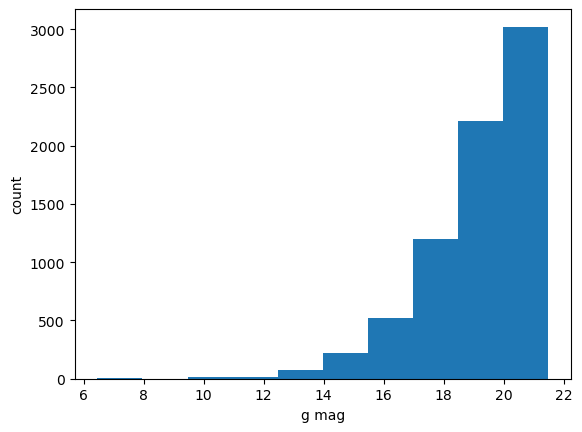

In [108]:
import astropy.units as u
import matplotlib.pyplot as plt
flux = df['phot_g_mean_flux'].values
mag = (flux*u.nJy).to(u.ABmag)
df['phot_g_mean_mag'] = mag
plt.xlabel('g mag')
plt.ylabel('count')
plt.hist(mag)


Plot both the reference catalog sources  and the simulated centroid sources, normalizing the distribution to show the magnitude extent:

(array([0.00932586, 0.        , 0.00932586, 0.00621724, 0.01243448,
        0.0155431 , 0.02486896, 0.05284654, 0.04973792, 0.05595516,
        0.06838964, 0.06528102, 0.09636722, 0.17719135, 0.17097411,
        0.19584307, 0.25179823, 0.28288443, 0.26423271, 0.31397063]),
 array([11.67791376, 12.14890371, 12.61989366, 13.09088361, 13.56187356,
        14.03286351, 14.50385346, 14.97484342, 15.44583337, 15.91682332,
        16.38781327, 16.85880322, 17.32979317, 17.80078312, 18.27177307,
        18.74276302, 19.21375297, 19.68474293, 20.15573288, 20.62672283,
        21.09771278]),
 [<matplotlib.patches.Polygon at 0x7fbdf8dc2e10>])

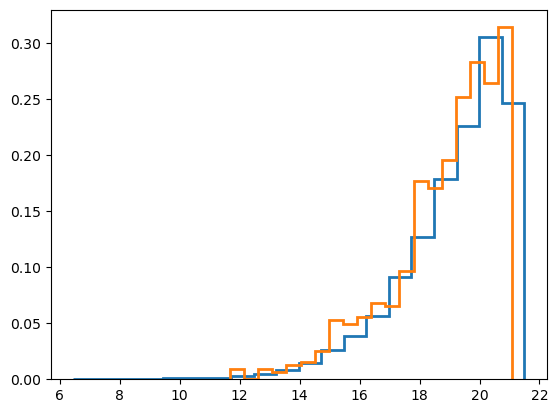

In [109]:
plt.hist(mag, density=True, stacked=True, histtype='step',lw=2, bins=20)
plt.hist(mag[df['simulated'] ==True], density=True, stacked=True,lw=2, bins=20,histtype='step')

In [110]:
print(min(mag))
print(min(mag[df['simulated'] ==True]))

6.456676983180913 mag(AB)
11.677913757880114 mag(AB)


We see that the refcat  in this sky area contains sources all the way up to 6th magnitude. But with `max_flux` set to eg. `1e9` we only simulate sources up to about 11th magnitude (`1e10` would result in about 10th magnitude). 

We can overplot the refcat sources on top of the postISR images: 

In [113]:
from lsst.daf import butler as dafButler

collection = 'run1'
instrument= 'LSSTComCam'
detector=0
# 68661: 940
# 68659: 950
exposure_number = 5025082000942

# construct a dataId  for postISR extra-focal 
data_id_extra = {
    "detector": detector,
    "instrument": instrument,
    "exposure": exposure_number,
    "visit":exposure_number
}

# read the postISR exposure
path_cwd = '/sdf/data/rubin/shared/scichris/DM-41679_lsstComCam/'
butlerRootPath = os.path.join(path_cwd, 'gen3repo_1e9')
butler = dafButler.Butler(butlerRootPath)
exposure_extra = butler.get("postISRCCD", data_id_extra, collections=[collection])

donut_catalog = butler.get(
    "donutCatalog",  dataId=data_id_extra, collections=[collection]
    )
mean_ra_rad = np.mean(donut_catalog.coord_ra.values)
mean_dec_rad = np.mean(donut_catalog.coord_dec.values)

mean_ra_deg = np.rad2deg(mean_ra_rad)
mean_dec_deg = np.rad2deg(mean_dec_rad)
print(mean_ra_deg, mean_dec_deg)

295.28658275293776 -81.61027853977816


In [121]:
exposure_extra.getDetector().getName()

'R22_S00'

Text(0, 0.5, 'y [px]')

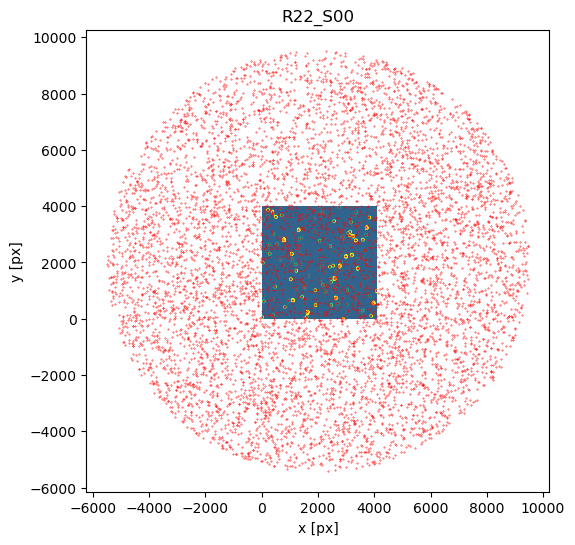

In [137]:
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
fig,ax = plt.subplots(1,1, figsize=(6,6))

zscale = ZScaleInterval()

wcs = exposure_extra.getWcs()
x,y = wcs.skyToPixelArray(df['coord_ra'], df['coord_dec'])

d = exposure_extra.image.array
vmin,vmax = zscale.get_limits(d)
plt.imshow(d,origin='lower', vmin=vmin, vmax=vmax)
plt.scatter(x,y,s=0.1,c='red')
plt.title(exposure_extra.getDetector().getName())
plt.xlabel('x [px]')
plt.ylabel('y [px]')


Notice that `1500` arcsec is sufficient to encompass all 9 comCam rafts.  If we set the image limits to the CCD dimensions, and select only refcat sources brighter than 16th mag we notice that the simulated sources indeed correspond to the refcat sources:

(0.0, 4000.0)

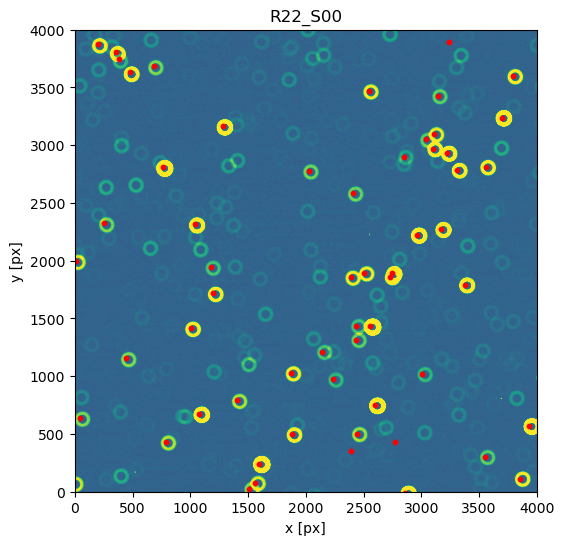

In [136]:
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
fig,ax = plt.subplots(1,1, figsize=(6,6))
plt.imshow(d,origin='lower', vmin=vmin, vmax=vmax)
m=mag.value<16
plt.scatter(x[m],y[m],s=10, c='red')
plt.title(exposure_extra.getDetector().getName())
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.xlim(0,4000)
plt.ylim(0,4000)

Note that some bright refcat sources are absent from the image. These are excluded by the `max_flux` setting. 

In [145]:
len(donut_stamps)

16

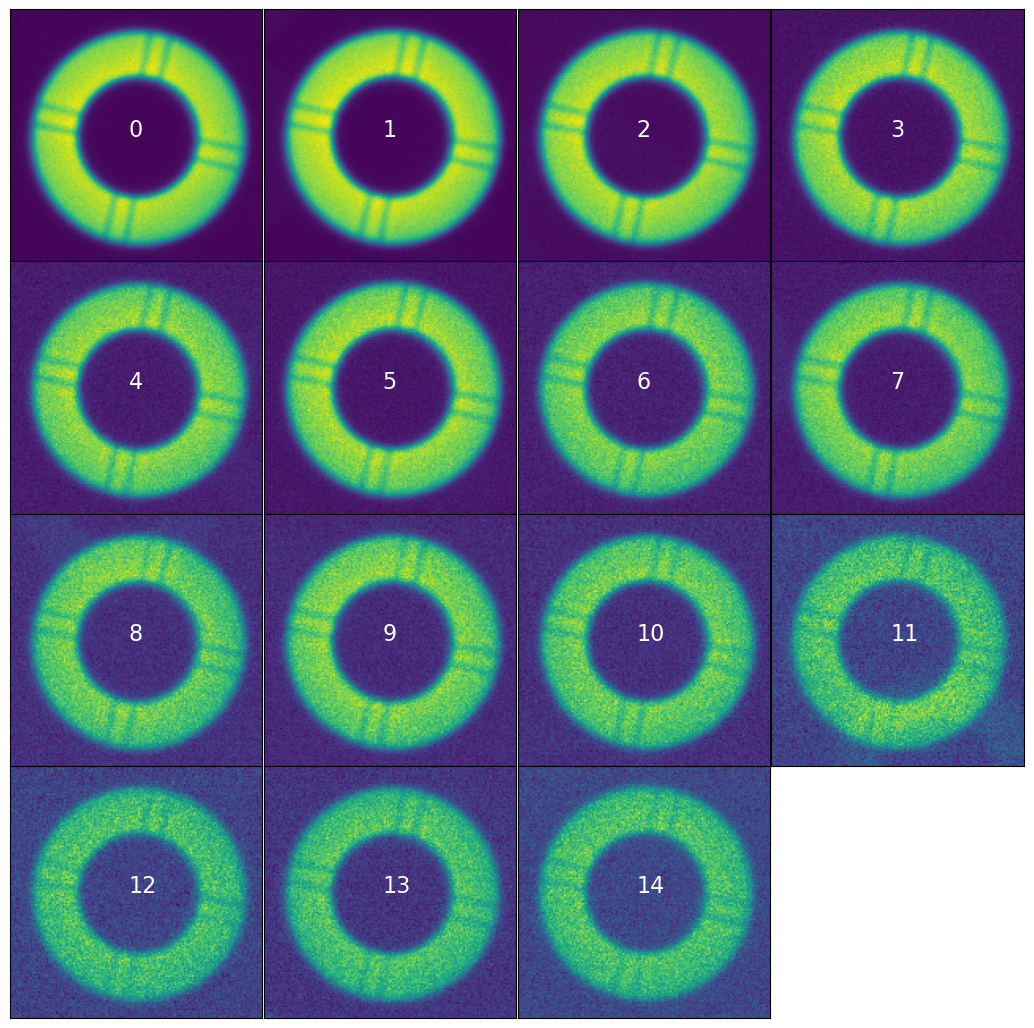

In [149]:
%matplotlib inline
import numpy as np
donut_stamps = butler.get(
    "donutStampsExtra", dataId=data_id_extra, collections=[collection]
)


fig,axs = plt.subplots(4,4, figsize=(13.1,13.1))
ax = np.ravel(axs)
i=0
for j in range(1,len(donut_stamps)):
    stamp = donut_stamps[j]
    ax[i].imshow(stamp.stamp_im.image.array)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].text(75,80,i, fontsize=16, color='white')
    i+=1
ax[-1].set_axis_off()
fig.subplots_adjust(hspace=0, wspace=0)
